<a href="https://colab.research.google.com/github/Sujeet2003/Quora-Question-Pair/blob/main/Quora_Question_Pair_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/quora.csv')

In [4]:
sample_df = df.sample(30000, random_state=2)

In [5]:
sample_df

,id,qid1,qid2,question1,question2,is_duplicate
95166,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0
185366,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1
178034,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1
366635,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0
215719,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0
...,...,...,...,...,...,...
185012,185158,365646,365647,What's the best place to visit for summer?,What is the best place to visit in summer?,1
277646,277866,546311,546312,How can I get over this girl?,How do I get over a girl I cannot be with?,1
387331,387648,757859,757860,How do I become a graphics designer?,Should I become a graphic designer?,0
279974,280197,550837,550838,How do I bake a cake in a microwave oven?,How do you bake cakes in a convection oven?,0


# Previous notebook's feature engineering on `30000 sample data` to keep that features

In [6]:
sample_df.shape

(30000, 6)

In [7]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 95166 to 293326
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


is_duplicate
0    18880
1    11120
Name: count, dtype: int64
is_duplicate
0    62.933333
1    37.066667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

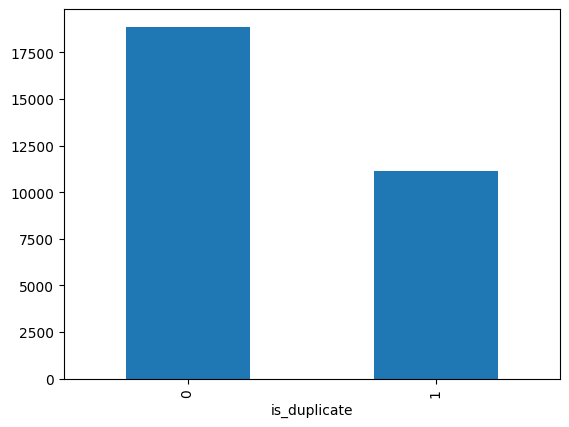

In [8]:
# distribution of duplicates and non-duplicates

print(sample_df['is_duplicate'].value_counts())
print((sample_df['is_duplicate'].value_counts()/sample_df['is_duplicate'].count())*100)

sample_df['is_duplicate'].value_counts().plot(kind='bar')

unique questions: 59832
Repeated questions: 145


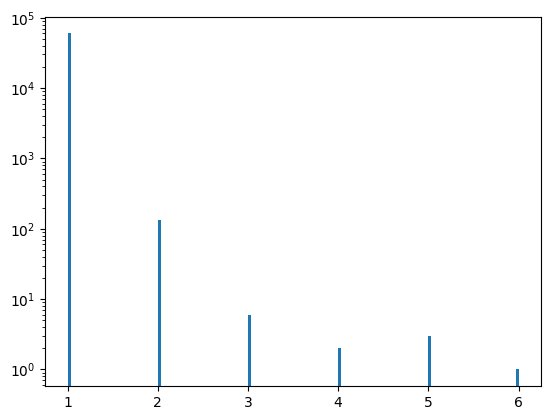

In [9]:
# distribution of repeated and non-repeated questions

ques_ids = pd.Series(list(sample_df['qid1']) + list(sample_df['qid2']))
print("unique questions:", np.unique(ques_ids).shape[0])

repeated = ques_ids.value_counts() > 1
print("Repeated questions:", repeated[repeated].shape[0])

plt.hist(ques_ids.value_counts().values, bins=150)
plt.yscale('log')
plt.show()

In [10]:
# lengths of each question

sample_df['q1_len'] = sample_df['question1'].str.len()
sample_df['q2_len'] = sample_df['question2'].str.len()

In [11]:
sample_df.shape

(30000, 8)

In [12]:
# words in each questions

sample_df['q1_words_len'] = sample_df['question1'].apply(lambda x: len(x.split(" ")))
sample_df["q2_words_len"] = sample_df['question2'].apply(lambda x: len(x.split(" ")))

In [13]:
sample_df.shape

(30000, 10)

In [14]:
# total words

sample_df['total_words'] = sample_df['q1_words_len'] + sample_df['q2_words_len']

In [15]:
sample_df.shape

(30000, 11)

In [16]:
# common words

def common_words(row):
  words1 = set(map(lambda x: x.lower().strip(), row['question1'].split()))
  words2 = set(map(lambda x: x.lower().strip(), row['question2'].split()))
  return len(words1 & words2)

In [17]:
sample_df["common_words_len"] = sample_df.apply(common_words, axis=1)

In [18]:
sample_df.shape

(30000, 12)

In [19]:
# shared words

sample_df['shared_words'] = np.round(sample_df["common_words_len"]/sample_df["total_words"], 2)

In [20]:
sample_df.shape

(30000, 13)

In [22]:
sample_df.sample()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,total_words,common_words_len,shared_words
99002,99080,196629,196630,Is watching porn once or twice a month a bad t...,Is watching porn sin?,1,51,21,11,4,15,3,0.2
